In [1]:
import os
import sys

# Get the absolute path to the parent folder
parent_folder = os.path.abspath(os.path.join(os.getcwd(), "..", os.pardir))

# Add the parent folder to sys.path if it's not already included
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from agents.sarsa import Sarsa
from agents.qlearning import QLearning
from policies.eps_greedy_policy import EpsGreedy
from policies.softmax_policy import Softmax

from utils.encoding import cw_encoding
from utils.utils_fct import line_bar_plot, plot_moving_averages, process_json
from utils.custom_gym_envs import CustomCliffWalkingEnv

env = gym.make("CliffWalking-v0", is_slippery=True, render_mode=None)

In [2]:
# Agents
eps_greedy_sarsa = Sarsa(
    encode_fct=cw_encoding,
    policy=EpsGreedy(0.001),
    nb_actions=env.action_space.n,
)

eps_greedy_qlearning = QLearning(
    encode_fct=cw_encoding,
    policy=EpsGreedy(0.001),
    nb_actions=env.action_space.n,
)

# softmax_sarsa = Sarsa(
#     encode_fct=cw_encoding,
#     policy=Softmax(1),
#     nb_actions=env.action_space.n,
# )

# softmax_qlearning = QLearning(
#     encode_fct=cw_encoding,
#     policy=Softmax(1),
#     nb_actions=env.action_space.n,
# )

# Envs
env_0 = CustomCliffWalkingEnv(slippery_prob=0)
env_033 = CustomCliffWalkingEnv(slippery_prob=0.33)
env_066 = CustomCliffWalkingEnv(slippery_prob=0.66)
env_1 = CustomCliffWalkingEnv(slippery_prob=1)

In [3]:
sarsa_agent = Sarsa(
    encode_fct=cw_encoding,
    policy=EpsGreedy(0.01),
    nb_actions=env.action_space.n,
)

_ = sarsa_agent.train(
    env=env_0,
    alpha=0.1,
    gamma=1,
    policy_action_params={},
    policy_update_params={"use_glei": True},
    nb_episodes=1000,
    verbose=1,
)
_ = sarsa_agent.evaluate_policy(
    env=env, policy_action_params={"hard_policy": True}, nb_episodes=10, verbose=1
)

Last reward of training -15
Average Total Reward over 10 episodes: -3257.6


# I. Graphics

## I.1. Slippery prob = 0

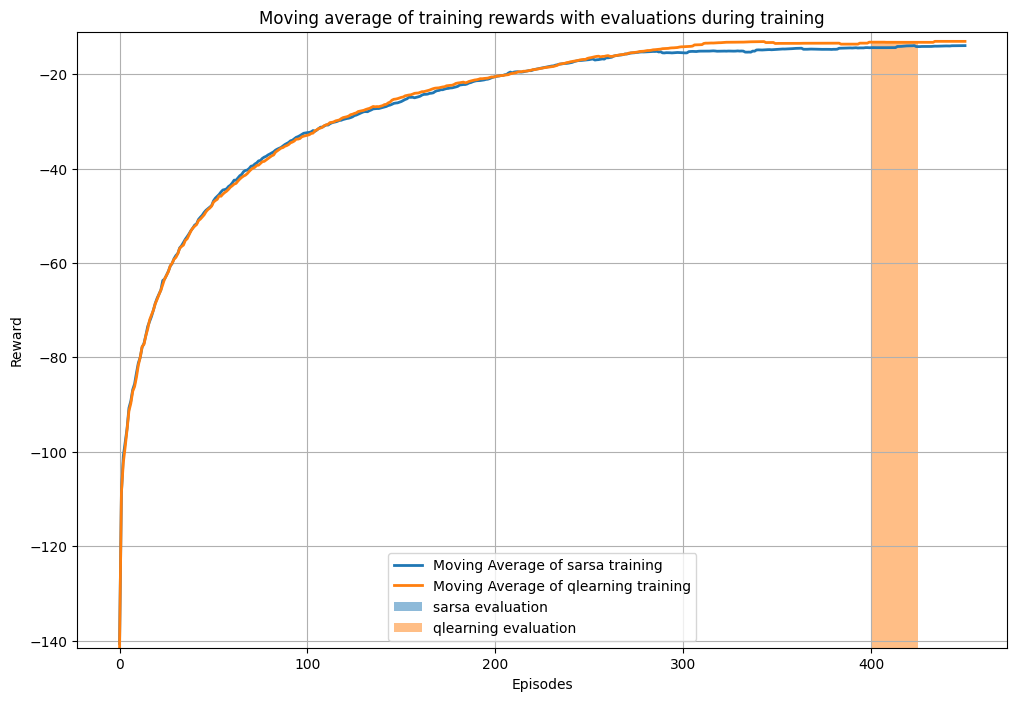

In [5]:
data_dict = process_json(
    "../../data/cliff_walking/compare/eps_greedy/sarsa_vs_qlearning_slippery_prob=0",
    "r",
)
line_bar_plot(
    lineplot_window_size=50,
    bar_chart_width=50,
    traning_data=data_dict["training_data"],
    evaluation_data=data_dict["evaluation_data"],
)

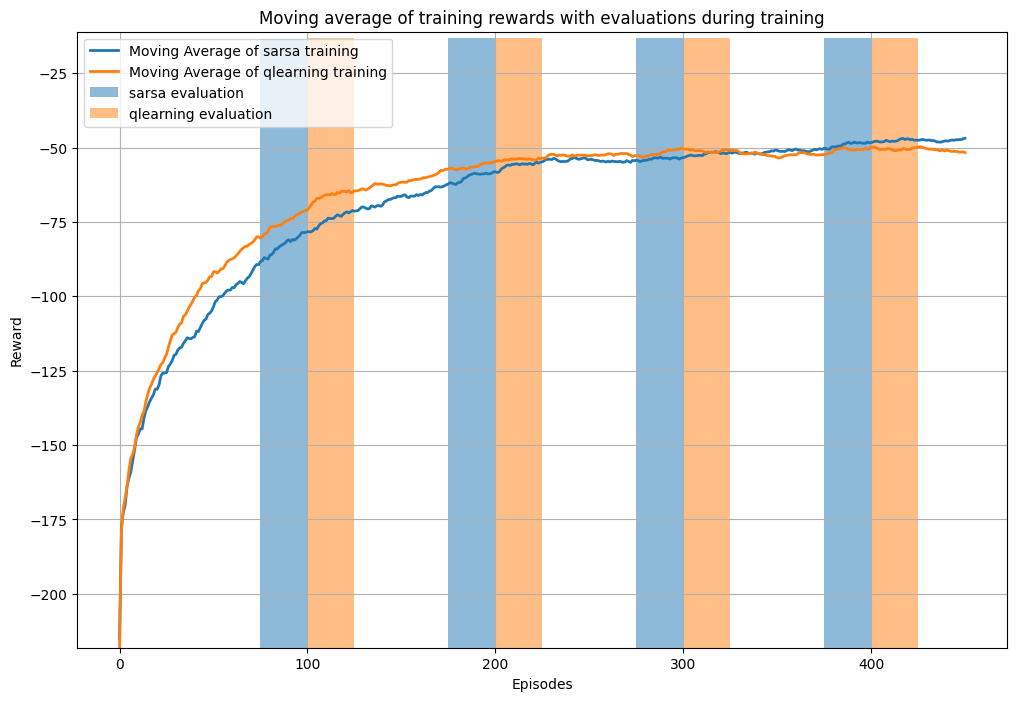

In [16]:
data_dict = process_json(
    "../../data/cliff_walking/compare/softmax/sarsa_vs_qlearning_slippery_prob=0",
    "r",
)
line_bar_plot(
    lineplot_window_size=50,
    bar_chart_width=50,
    traning_data=data_dict["training_data"],
    evaluation_data=data_dict["evaluation_data"],
)

## I.2. Slippery prob = 0.33

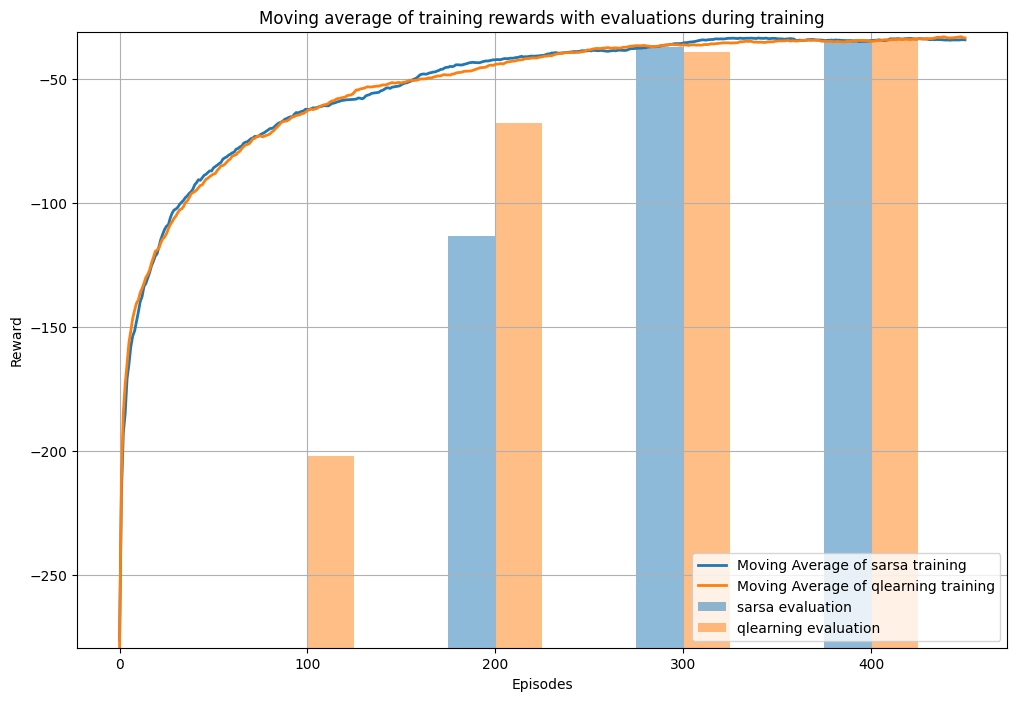

In [8]:
data_dict = process_json(
    "../../data/cliff_walking/compare/eps_greedy/sarsa_vs_qlearning_slippery_prob=0.33",
    "r",
)
line_bar_plot(
    lineplot_window_size=50,
    bar_chart_width=50,
    traning_data=data_dict["training_data"],
    evaluation_data=data_dict["evaluation_data"],
)

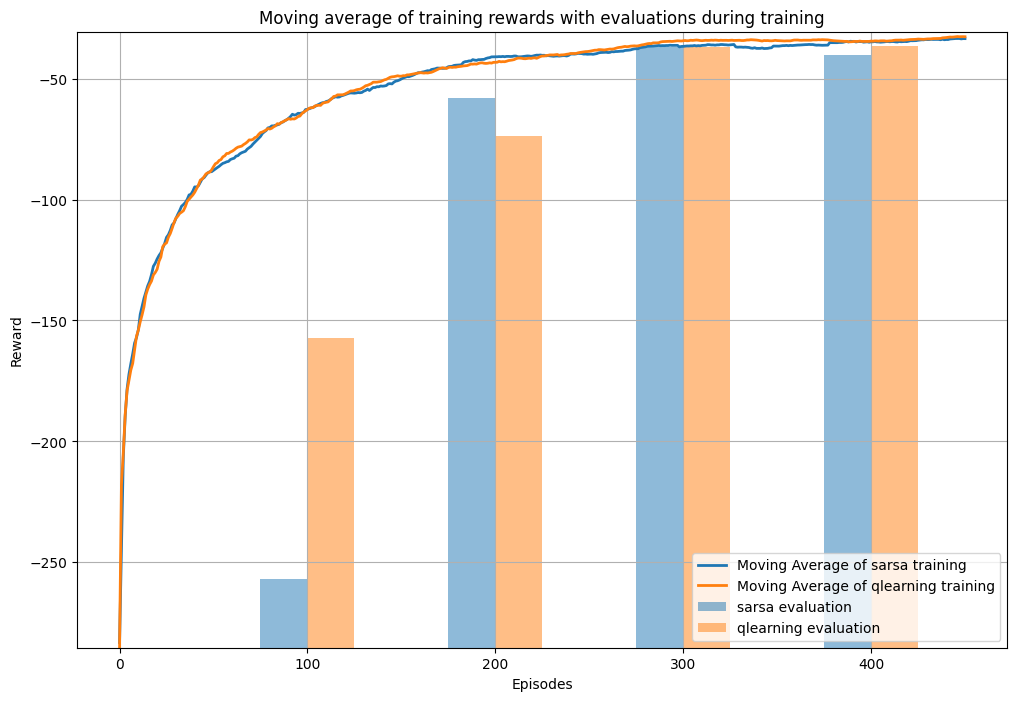

In [9]:
data_dict = process_json(
    "../../data/cliff_walking/compare/eps_greedy/sarsa_vs_qlearning_slippery_prob=0.33_2",
    "r",
)
line_bar_plot(
    lineplot_window_size=50,
    bar_chart_width=50,
    traning_data=data_dict["training_data"],
    evaluation_data=data_dict["evaluation_data"],
)

## I.3. Slippery prob = 0.66

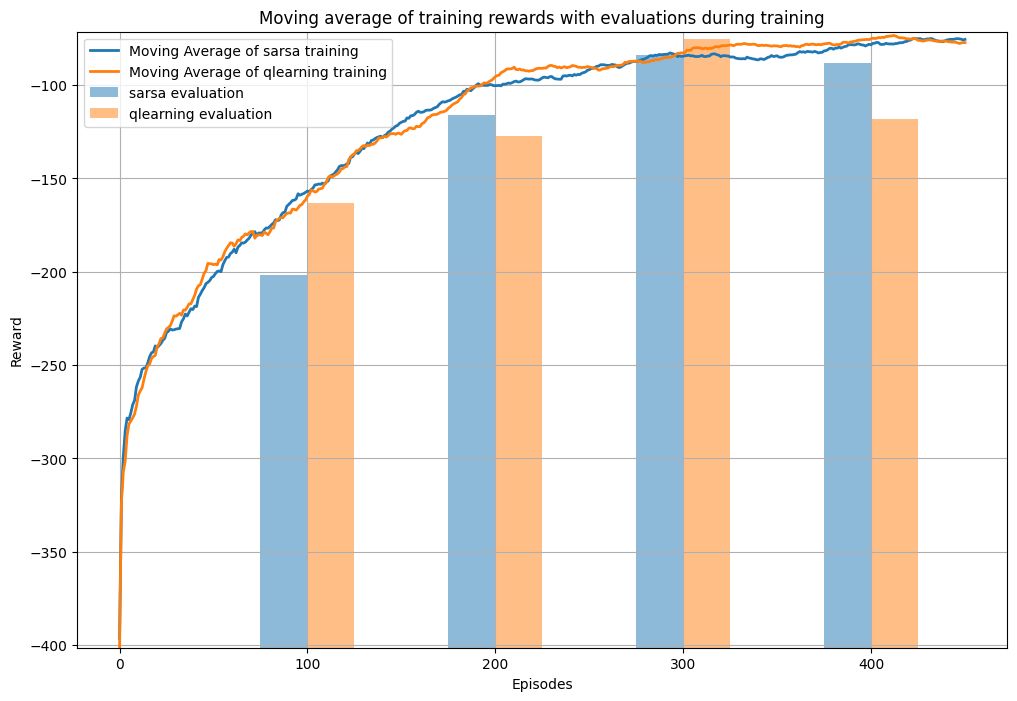

In [7]:
data_dict = process_json(
    "../../data/cliff_walking/compare/eps_greedy/sarsa_vs_qlearning_slippery_prob=0.66",
    "r",
)
line_bar_plot(
    lineplot_window_size=50,
    bar_chart_width=50,
    traning_data=data_dict["training_data"],
    evaluation_data=data_dict["evaluation_data"],
)

## I.4. Slippery prob = 1

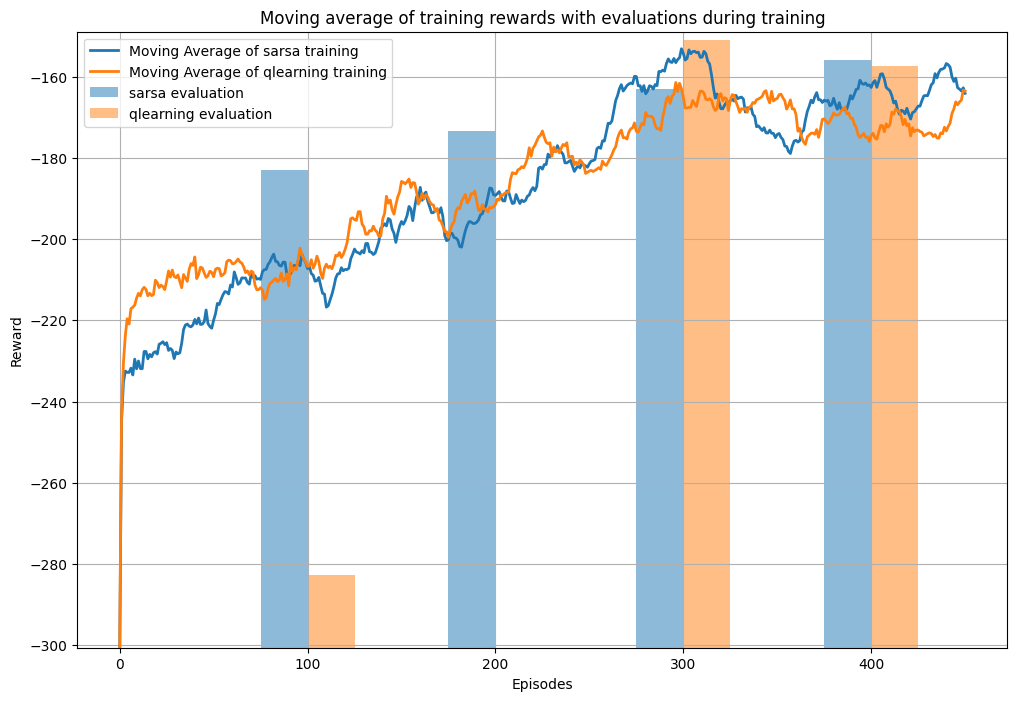

In [ ]:
data_dict = process_json(
    "../../data/cliff_walking/compare/eps_greedy/sarsa_vs_qlearning_slippery_prob=1",
    "r",
)
line_bar_plot(
    lineplot_window_size=50,
    bar_chart_width=50,
    traning_data=data_dict["training_data"],
    evaluation_data=data_dict["evaluation_data"],
)

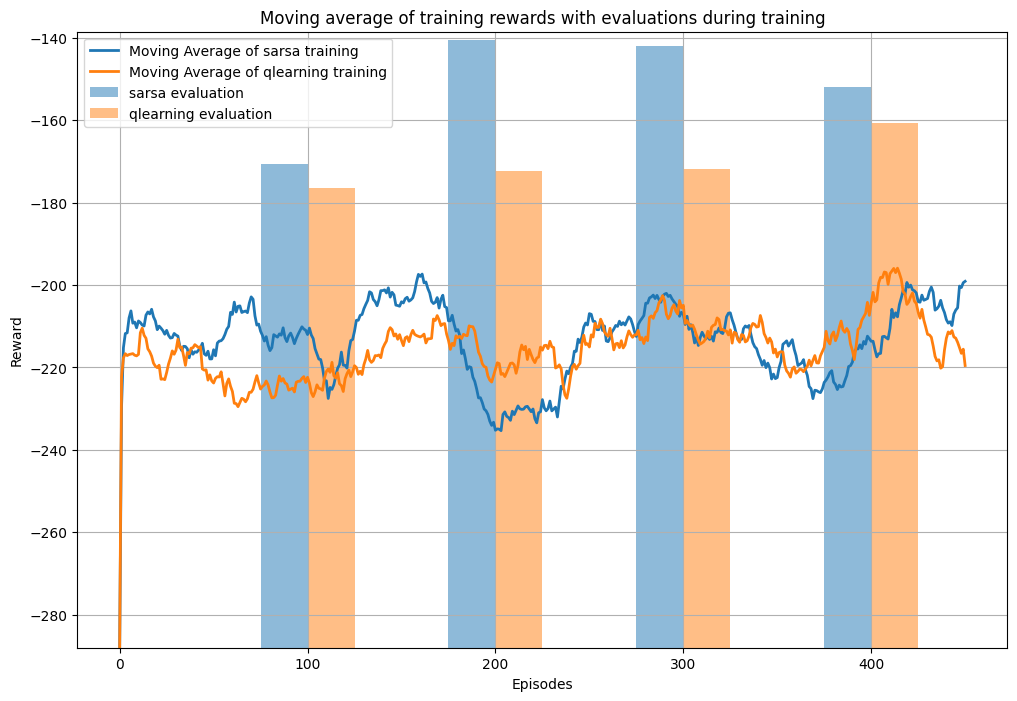

In [1]:
data_dict = process_json(
    "../../data/cliff_walking/compare/softmax/sarsa_vs_qlearning_slippery_prob=1",
    "r",
)
line_bar_plot(
    lineplot_window_size=50,
    bar_chart_width=50,
    traning_data=data_dict["training_data"],
    evaluation_data=data_dict["evaluation_data"],
)

# II. Agents training

## II.1. Slippery prob = 0

In [3]:
sarsa_training_data = []
sarsa_evaluation_data = {"x": [], "data": []}


for i in range(10):
    eps_greedy_sarsa_rewards, eps_greedy_sarsa_evaluations = eps_greedy_sarsa.train(
        env=env_0,
        policy_action_params={},
        policy_update_params={"use_glei": True},
        alpha=0.1,
        gamma=0.9,
        nb_episodes=500,
        to_evaluate=True,
        evaluation_params={"hard_policy": True},
        evaluation_frequency=5,
        verbose=2,
    )
    sarsa_training_data.append(eps_greedy_sarsa_rewards)
    sarsa_evaluation_data["data"].append(eps_greedy_sarsa_evaluations["data"])

sarsa_training_data = np.mean(np.array(sarsa_training_data), axis=0)

sarsa_evaluation_data["x"] = eps_greedy_sarsa_evaluations["x"]
sarsa_evaluation_data["data"] = np.mean(np.array(sarsa_evaluation_data["data"]), axis=0)


qlearning_training_data = []
qlearning_evaluation_data = {"x": [], "data": []}

for i in range(10):
    eps_greedy_qlearning_rewards, eps_greedy_qlearning_evaluations = (
        eps_greedy_qlearning.train(
            env=env_0,
            policy_action_params={},
            policy_update_params={"use_glei": True},
            alpha=0.1,
            gamma=0.9,
            nb_episodes=500,
            to_evaluate=True,
            evaluation_params={"hard_policy": True},
            evaluation_frequency=5,
            verbose=2,
        )
    )
    qlearning_training_data.append(eps_greedy_qlearning_rewards)
    qlearning_evaluation_data["data"].append(eps_greedy_qlearning_evaluations["data"])

qlearning_training_data = np.mean(np.array(qlearning_training_data), axis=0)

qlearning_evaluation_data["x"] = eps_greedy_qlearning_evaluations["x"]
qlearning_evaluation_data["data"] = np.mean(
    np.array(qlearning_evaluation_data["data"]), axis=0
)

sarsa_training_data = list(sarsa_training_data)
qlearning_training_data = list(qlearning_training_data)
sarsa_evaluation_data["data"] = list(sarsa_evaluation_data["data"])
qlearning_evaluation_data["data"] = list(qlearning_evaluation_data["data"])

process_json(
    "../../data/cliff_walking/compare/eps_greedy/sarsa_vs_qlearning_slippery_prob=0",
    "w",
    data_dict={
        "training_data": {
            "sarsa training": sarsa_training_data,
            "qlearning training": qlearning_training_data,
        },
        "evaluation_data": {
            "sarsa evaluation": sarsa_evaluation_data,
            "qlearning evaluation": qlearning_evaluation_data,
        },
    },
)

Episode 1: Total Reward = -1826
Episode 2: Total Reward = -181
Episode 3: Total Reward = -219
Episode 4: Total Reward = -233
Episode 5: Total Reward = -277
Episode 6: Total Reward = -125
Episode 7: Total Reward = -163
Episode 8: Total Reward = -97
Episode 9: Total Reward = -205
Episode 10: Total Reward = -111
Episode 11: Total Reward = -137
Episode 12: Total Reward = -159
Episode 13: Total Reward = -105
Episode 14: Total Reward = -143
Episode 15: Total Reward = -120
Episode 16: Total Reward = -73
Episode 17: Total Reward = -115
Episode 18: Total Reward = -147
Episode 19: Total Reward = -131
Episode 20: Total Reward = -69
Episode 21: Total Reward = -95
Episode 22: Total Reward = -101
Episode 23: Total Reward = -133
Episode 24: Total Reward = -69
Episode 25: Total Reward = -85
Episode 26: Total Reward = -75
Episode 27: Total Reward = -109
Episode 28: Total Reward = -55
Episode 29: Total Reward = -137
Episode 30: Total Reward = -65
Episode 31: Total Reward = -103
Episode 32: Total Reward 

## II.2. Slippery prob = 0.33

In [10]:
sarsa_training_data = []
sarsa_evaluation_data = {"x": [], "data": []}


for i in range(10):
    eps_greedy_sarsa_rewards, eps_greedy_sarsa_evaluations = eps_greedy_sarsa.train(
        env=env_033,
        policy_action_params={},
        policy_update_params={"use_glei": True},
        alpha=0.1,
        gamma=0.9,
        nb_episodes=500,
        to_evaluate=True,
        evaluation_params={"hard_policy": True},
        evaluation_frequency=5,
        verbose=1,
    )
    sarsa_training_data.append(eps_greedy_sarsa_rewards)
    sarsa_evaluation_data["data"].append(eps_greedy_sarsa_evaluations["data"])

sarsa_training_data = np.mean(np.array(sarsa_training_data), axis=0)

sarsa_evaluation_data["x"] = eps_greedy_sarsa_evaluations["x"]
sarsa_evaluation_data["data"] = np.mean(np.array(sarsa_evaluation_data["data"]), axis=0)


qlearning_training_data = []
qlearning_evaluation_data = {"x": [], "data": []}

for i in range(10):
    eps_greedy_qlearning_rewards, eps_greedy_qlearning_evaluations = (
        eps_greedy_qlearning.train(
            env=env_033,
            policy_action_params={},
            policy_update_params={"use_glei": True},
            alpha=0.1,
            gamma=0.9,
            nb_episodes=500,
            to_evaluate=True,
            evaluation_params={"hard_policy": True},
            evaluation_frequency=5,
            verbose=1,
        )
    )
    qlearning_training_data.append(eps_greedy_qlearning_rewards)
    qlearning_evaluation_data["data"].append(eps_greedy_qlearning_evaluations["data"])

qlearning_training_data = np.mean(np.array(qlearning_training_data), axis=0)

qlearning_evaluation_data["x"] = eps_greedy_qlearning_evaluations["x"]
qlearning_evaluation_data["data"] = np.mean(
    np.array(qlearning_evaluation_data["data"]), axis=0
)

sarsa_training_data = list(sarsa_training_data)
qlearning_training_data = list(qlearning_training_data)
sarsa_evaluation_data["data"] = list(sarsa_evaluation_data["data"])
qlearning_evaluation_data["data"] = list(qlearning_evaluation_data["data"])

process_json(
    "../../data/cliff_walking/compare/eps_greedy/sarsa_vs_qlearning_slippery_prob=0.33_3",
    "w",
    data_dict={
        "training_data": {
            "sarsa training": sarsa_training_data,
            "qlearning training": qlearning_training_data,
        },
        "evaluation_data": {
            "sarsa evaluation": sarsa_evaluation_data,
            "qlearning evaluation": qlearning_evaluation_data,
        },
    },
)

Average Total Reward over 10 episodes: -65.5
Average Total Reward over 10 episodes: -50.6
Average Total Reward over 10 episodes: -40.3
Average Total Reward over 10 episodes: -34.9
Last reward of training -29
Average Total Reward over 10 episodes: -221.6
Average Total Reward over 10 episodes: -40.6
Average Total Reward over 10 episodes: -33.5
Average Total Reward over 10 episodes: -52.6
Last reward of training -28
Average Total Reward over 10 episodes: -88.8
Average Total Reward over 10 episodes: -44.2
Average Total Reward over 10 episodes: -44.3
Average Total Reward over 10 episodes: -30.2
Last reward of training -29
Average Total Reward over 10 episodes: -548.5
Average Total Reward over 10 episodes: -50.4
Average Total Reward over 10 episodes: -39.0
Average Total Reward over 10 episodes: -32.1
Last reward of training -35
Average Total Reward over 10 episodes: -113.8
Average Total Reward over 10 episodes: -35.4
Average Total Reward over 10 episodes: -34.0
Average Total Reward over 10 e

## II.3. Slippery prob = 0.66

In [3]:
sarsa_training_data = []
sarsa_evaluation_data = {"x": [], "data": []}


for i in range(10):
    eps_greedy_sarsa_rewards, eps_greedy_sarsa_evaluations = eps_greedy_sarsa.train(
        env=env_066,
        policy_action_params={},
        policy_update_params={"use_glei": True},
        alpha=0.1,
        gamma=0.9,
        nb_episodes=500,
        to_evaluate=True,
        evaluation_frequency=5,
        verbose=0,
    )
    sarsa_training_data.append(eps_greedy_sarsa_rewards)
    sarsa_evaluation_data["data"].append(eps_greedy_sarsa_evaluations["data"])

sarsa_training_data = np.mean(np.array(sarsa_training_data), axis=0)

sarsa_evaluation_data["x"] = eps_greedy_sarsa_evaluations["x"]
sarsa_evaluation_data["data"] = np.mean(np.array(sarsa_evaluation_data["data"]), axis=0)


qlearning_training_data = []
qlearning_evaluation_data = {"x": [], "data": []}

for i in range(10):
    eps_greedy_qlearning_rewards, eps_greedy_qlearning_evaluations = (
        eps_greedy_qlearning.train(
            env=env_066,
            policy_action_params={},
            policy_update_params={"use_glei": True},
            alpha=0.1,
            gamma=0.9,
            nb_episodes=500,
            to_evaluate=True,
            evaluation_frequency=5,
            verbose=0,
        )
    )
    qlearning_training_data.append(eps_greedy_qlearning_rewards)
    qlearning_evaluation_data["data"].append(eps_greedy_qlearning_evaluations["data"])

qlearning_training_data = np.mean(np.array(qlearning_training_data), axis=0)

qlearning_evaluation_data["x"] = eps_greedy_qlearning_evaluations["x"]
qlearning_evaluation_data["data"] = np.mean(
    np.array(qlearning_evaluation_data["data"]), axis=0
)

sarsa_training_data = list(sarsa_training_data)
qlearning_training_data = list(qlearning_training_data)
sarsa_evaluation_data["data"] = list(sarsa_evaluation_data["data"])
qlearning_evaluation_data["data"] = list(qlearning_evaluation_data["data"])

process_json(
    "../../data/cliff_walking/compare/eps_greedy/sarsa_vs_qlearning_slippery_prob=0.66",
    "w",
    data_dict={
        "training_data": {
            "sarsa training": sarsa_training_data,
            "qlearning training": qlearning_training_data,
        },
        "evaluation_data": {
            "sarsa evaluation": sarsa_evaluation_data,
            "qlearning evaluation": qlearning_evaluation_data,
        },
    },
)

KeyboardInterrupt: 

## II.4. Slippery prob = 1

In [5]:
sarsa_training_data = []
sarsa_evaluation_data = {"x": [], "data": []}


for i in range(10):
    eps_greedy_sarsa_rewards, eps_greedy_sarsa_evaluations = eps_greedy_sarsa.train(
        env=env_1,
        policy_action_params={},
        policy_update_params={"use_glei": True},
        alpha=0.1,
        gamma=0.9,
        nb_episodes=500,
        to_evaluate=True,
        evaluation_params={"hard_policy": True},
        evaluation_frequency=5,
        verbose=2,
    )
    sarsa_training_data.append(eps_greedy_sarsa_rewards)
    sarsa_evaluation_data["data"].append(eps_greedy_sarsa_evaluations["data"])

sarsa_training_data = np.mean(np.array(sarsa_training_data), axis=0)

sarsa_evaluation_data["x"] = eps_greedy_sarsa_evaluations["x"]
sarsa_evaluation_data["data"] = np.mean(np.array(sarsa_evaluation_data["data"]), axis=0)


qlearning_training_data = []
qlearning_evaluation_data = {"x": [], "data": []}

for i in range(10):
    eps_greedy_qlearning_rewards, eps_greedy_qlearning_evaluations = (
        eps_greedy_qlearning.train(
            env=env_1,
            policy_action_params={},
            policy_update_params={"use_glei": True},
            alpha=0.1,
            gamma=0.9,
            nb_episodes=500,
            to_evaluate=True,
            evaluation_params={"hard_policy": True},
            evaluation_frequency=5,
            verbose=2,
        )
    )
    qlearning_training_data.append(eps_greedy_qlearning_rewards)
    qlearning_evaluation_data["data"].append(eps_greedy_qlearning_evaluations["data"])

qlearning_training_data = np.mean(np.array(qlearning_training_data), axis=0)

qlearning_evaluation_data["x"] = eps_greedy_qlearning_evaluations["x"]
qlearning_evaluation_data["data"] = np.mean(
    np.array(qlearning_evaluation_data["data"]), axis=0
)

sarsa_training_data = list(sarsa_training_data)
qlearning_training_data = list(qlearning_training_data)
sarsa_evaluation_data["data"] = list(sarsa_evaluation_data["data"])
qlearning_evaluation_data["data"] = list(qlearning_evaluation_data["data"])

process_json(
    "../../data/cliff_walking/compare/eps_greedy/sarsa_vs_qlearning_slippery_prob=1",
    "w",
    data_dict={
        "training_data": {
            "sarsa training": sarsa_training_data,
            "qlearning training": qlearning_training_data,
        },
        "evaluation_data": {
            "sarsa evaluation": sarsa_evaluation_data,
            "qlearning evaluation": qlearning_evaluation_data,
        },
    },
)

Episode 1: Total Reward = -3463
Episode 2: Total Reward = -900
Episode 3: Total Reward = -195
Episode 4: Total Reward = -322
Episode 5: Total Reward = -261
Episode 6: Total Reward = -128
Episode 7: Total Reward = -83
Episode 8: Total Reward = -455
Episode 9: Total Reward = -93
Episode 10: Total Reward = -178
Episode 11: Total Reward = -74
Episode 12: Total Reward = -106
Episode 13: Total Reward = -642
Episode 14: Total Reward = -649
Episode 15: Total Reward = -267
Episode 16: Total Reward = -236
Episode 17: Total Reward = -57
Episode 18: Total Reward = -48
Episode 19: Total Reward = -141
Episode 20: Total Reward = -586
Episode 21: Total Reward = -124
Episode 22: Total Reward = -218
Episode 23: Total Reward = -134
Episode 24: Total Reward = -183
Episode 25: Total Reward = -35
Episode 26: Total Reward = -84
Episode 27: Total Reward = -80
Episode 28: Total Reward = -161
Episode 29: Total Reward = -60
Episode 30: Total Reward = -116
Episode 31: Total Reward = -210
Episode 32: Total Reward 

# Sandbox: Softmax agents

In [12]:
softmax_sarsa = Sarsa(
    encode_fct=cw_encoding,
    policy=Softmax(1),
    nb_actions=env.action_space.n,
)

softmax_qlearning = QLearning(
    encode_fct=cw_encoding,
    policy=Softmax(1),
    nb_actions=env.action_space.n,
)

## Slippery prob = 0

In [ ]:
sarsa_training_data = []
sarsa_evaluation_data = {"x": [], "data": []}


for i in range(10):
    softmax_sarsa_rewards, softmax_sarsa_evaluations = softmax_sarsa.train(
        env=env_0,
        policy_action_params={},
        policy_update_params={},
        alpha=0.4,
        gamma=0.9,
        nb_episodes=500,
        to_evaluate=True,
        evaluation_params={"hard_policy": True},
        evaluation_frequency=5,
        verbose=1,
    )
    sarsa_training_data.append(softmax_sarsa_rewards)
    sarsa_evaluation_data["data"].append(softmax_sarsa_evaluations["data"])

sarsa_training_data = np.mean(np.array(sarsa_training_data), axis=0)

sarsa_evaluation_data["x"] = softmax_sarsa_evaluations["x"]
sarsa_evaluation_data["data"] = np.mean(np.array(sarsa_evaluation_data["data"]), axis=0)


qlearning_training_data = []
qlearning_evaluation_data = {"x": [], "data": []}

for i in range(10):
    softmax_qlearning_rewards, softmax_qlearning_evaluations = softmax_qlearning.train(
        env=env_0,
        policy_action_params={},
        policy_update_params={},
        alpha=0.4,
        gamma=0.9,
        nb_episodes=500,
        to_evaluate=True,
        evaluation_params={"hard_policy": True},
        evaluation_frequency=5,
        verbose=1,
    )
    qlearning_training_data.append(softmax_qlearning_rewards)
    qlearning_evaluation_data["data"].append(softmax_qlearning_evaluations["data"])

qlearning_training_data = np.mean(np.array(qlearning_training_data), axis=0)

qlearning_evaluation_data["x"] = softmax_qlearning_evaluations["x"]
qlearning_evaluation_data["data"] = np.mean(
    np.array(qlearning_evaluation_data["data"]), axis=0
)

sarsa_training_data = list(sarsa_training_data)
qlearning_training_data = list(qlearning_training_data)
sarsa_evaluation_data["data"] = list(sarsa_evaluation_data["data"])
qlearning_evaluation_data["data"] = list(qlearning_evaluation_data["data"])

process_json(
    "../../data/cliff_walking/compare/softmax/sarsa_vs_qlearning_slippery_prob=0",
    "w",
    data_dict={
        "training_data": {
            "sarsa training": sarsa_training_data,
            "qlearning training": qlearning_training_data,
        },
        "evaluation_data": {
            "sarsa evaluation": sarsa_evaluation_data,
            "qlearning evaluation": qlearning_evaluation_data,
        },
    },
)

## Slippery prob = 1

In [18]:
sarsa_training_data = []
sarsa_evaluation_data = {"x": [], "data": []}


for i in range(10):
    softmax_sarsa_rewards, softmax_sarsa_evaluations = softmax_sarsa.train(
        env=env_1,
        policy_action_params={},
        policy_update_params={},
        alpha=0.4,
        gamma=0.9,
        nb_episodes=500,
        to_evaluate=True,
        evaluation_params={"hard_policy": True},
        evaluation_frequency=5,
        verbose=2,
    )
    sarsa_training_data.append(softmax_sarsa_rewards)
    sarsa_evaluation_data["data"].append(softmax_sarsa_evaluations["data"])

sarsa_training_data = np.mean(np.array(sarsa_training_data), axis=0)

sarsa_evaluation_data["x"] = softmax_sarsa_evaluations["x"]
sarsa_evaluation_data["data"] = np.mean(np.array(sarsa_evaluation_data["data"]), axis=0)


qlearning_training_data = []
qlearning_evaluation_data = {"x": [], "data": []}

for i in range(10):
    softmax_qlearning_rewards, softmax_qlearning_evaluations = softmax_qlearning.train(
        env=env_1,
        policy_action_params={},
        policy_update_params={},
        alpha=0.4,
        gamma=0.9,
        nb_episodes=500,
        to_evaluate=True,
        evaluation_params={"hard_policy": True},
        evaluation_frequency=5,
        verbose=2,
    )
    qlearning_training_data.append(softmax_qlearning_rewards)
    qlearning_evaluation_data["data"].append(softmax_qlearning_evaluations["data"])

qlearning_training_data = np.mean(np.array(qlearning_training_data), axis=0)

qlearning_evaluation_data["x"] = softmax_qlearning_evaluations["x"]
qlearning_evaluation_data["data"] = np.mean(
    np.array(qlearning_evaluation_data["data"]), axis=0
)

sarsa_training_data = list(sarsa_training_data)
qlearning_training_data = list(qlearning_training_data)
sarsa_evaluation_data["data"] = list(sarsa_evaluation_data["data"])
qlearning_evaluation_data["data"] = list(qlearning_evaluation_data["data"])

process_json(
    "../../data/cliff_walking/compare/softmax/sarsa_vs_qlearning_slippery_prob=1",
    "w",
    data_dict={
        "training_data": {
            "sarsa training": sarsa_training_data,
            "qlearning training": qlearning_training_data,
        },
        "evaluation_data": {
            "sarsa evaluation": sarsa_evaluation_data,
            "qlearning evaluation": qlearning_evaluation_data,
        },
    },
)

Episode 1: Total Reward = -4121
Episode 2: Total Reward = -459
Episode 3: Total Reward = -267
Episode 4: Total Reward = -189
Episode 5: Total Reward = -74
Episode 6: Total Reward = -251
Episode 7: Total Reward = -123
Episode 8: Total Reward = -269
Episode 9: Total Reward = -220
Episode 10: Total Reward = -66
Episode 11: Total Reward = -121
Episode 12: Total Reward = -63
Episode 13: Total Reward = -367
Episode 14: Total Reward = -70
Episode 15: Total Reward = -564
Episode 16: Total Reward = -93
Episode 17: Total Reward = -281
Episode 18: Total Reward = -320
Episode 19: Total Reward = -66
Episode 20: Total Reward = -113
Episode 21: Total Reward = -110
Episode 22: Total Reward = -152
Episode 23: Total Reward = -313
Episode 24: Total Reward = -105
Episode 25: Total Reward = -532
Episode 26: Total Reward = -352
Episode 27: Total Reward = -155
Episode 28: Total Reward = -89
Episode 29: Total Reward = -78
Episode 30: Total Reward = -68
Episode 31: Total Reward = -174
Episode 32: Total Reward 